<h1 align="center" style="margin-bottom: 20px;">Machine Learning 2024-25</h1>
<h3 align="center" style="margin-top: 20px; margin-bottom: 20px;">To Grant or Not to Grant: Deciding on Compensation Benefits</h3>
<h5 align="center" style="margin-top: 20px; margin-bottom: 0px;">Cross-Validation for Models with Default Parameters</h5>

### Group 38 - Members:
- Ana Marta Azinheira  - 20240496@novaims.unl.pt
- Braulio Damba - 20240007@novaims.unl.pt
- Catarina Ribeirinha - 20240507@novaims.unl.pt
- Marco Galão  - r20201545@novaims.unl.pt
- Rodrigo Sardinha - 20211627@novaims.unl.pt

# Table of Contents

* [1. Imports](#imports)
  * [1.1. Import Libraries](#import_libraries)
  * [1.2. Imports Datasets](#import_datasets)

* [2. Cross-Validation for Models with Default Parameters](#cv_default_parameters)

# 1. Imports <a id="imports"></a>

## 1.1. Import the Libraries <a class="anchor" id="import_libraries"></a>


In [1]:
# Path Management
import sys
import os

# Get the current working directory (folder where the notebook is located)
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
# Get the absolute path to the project root (one level up from the notebook's directory)
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
# Add the project root to sys.path
sys.path.append(project_root)
# Utils
from utils import *

# Visualization Settings
%config InlineBackend.figure_format = 'retina'
sns.set()

# Omit Warnings
import warnings
warnings.filterwarnings("ignore")

## 1.2. Import the Datasets <a class="anchor" id="import_datasets"></a>

In [2]:
# Define date columns to parse
date_cols = ["Accident Date", "Assembly Date", "C-2 Date", "C-3 Date", "First Hearing Date"]

In [3]:
df = pd.read_csv('../main_notebooks/df_nb2.csv', sep=',', parse_dates=date_cols, index_col='Claim Identifier')
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,C-2 Date,C-3 Date,Carrier Name,Carrier Type,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Male
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31,0.0,2020-01-01,0,0.00,2019-12-31,NaT,new hampshire insurance company,1A. PRIVATE,...,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662.0,1.0
5393091,2019-08-30,46,0.0,2020-01-01,1,1745.93,2020-01-01,2020-01-01,zurich american insurance company,1A. PRIVATE,...,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569.0,0.0
5393889,2019-12-06,40,0.0,2020-01-01,0,1434.80,2020-01-01,NaT,indemnity insurance company of,1A. PRIVATE,...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589.0,1.0
5393887,2019-12-30,61,0.0,2020-01-01,0,NaN,2019-12-31,NaT,state insurance fund,2A. SIF,...,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603.0,1.0
5393863,2019-12-26,67,0.0,2020-01-01,0,0.00,2019-12-31,NaT,indemnity insurance of n america,1A. PRIVATE,...,RETAIL TRADE,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772.0,1.0


# 2. Cross-Validation for Models with Default Parameters <a id="cv_default_parameters"></a>

In [4]:
# # Sample 10,000 observations from the dataset
# df_sample = df.sample(n=100_000, random_state=42)

In [5]:
# Define default models
models_default_parameters = {
    "Adaboost": {},
    "Bagging": {},
    "DecisionTree": {},
    # "GBM": {},
    "GaussianNB": {},
    "LogisticRegression": {},
    "NeuralNetworks": {},
    "RandomForest": {},
    # "SVM": {},
    "XGBoost": {},
}

# Using default models to choose which ones to optimize
default_models = define_models(models_default_parameters)
results, results_df = show_results(default_models, df, feats_dict)
results_df

--------------------------------------------------------------------------------
CV Iteration 1
--------------------------------------------------------------------------------

Starting Feature Selection:

Spearman Correlation - Number of Excluded Features: 2 / 19
Spearman Correlation - Excluded Features: {'Average Weekly Wage Category', 'Average Weekly Wage'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage Category')]

RFE - Number of Selected Features: 17 / 23
RFE - Selected Features: ['Age at Injury', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Average Weekly Wage', 'COVID-19 Indicator', 'District Name', 'Male', 'C-2 Date Missing', 'C-3 Date Missing', 'First Hearing Date Missing', 'Age Group at Injury', 'Average Weekly Wage Category', 'Age * Avg Weekly Wage', 'Average Weekly Wage by Medical Fee Region', 'Part of

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost: F1 Val = 0.220, F1 Train = 0.356, F1 Val-Train = -0.137, Time (s) = 12.23, Avg Iter = 0.0 Best Params = {}

Bagging: F1 Val = 0.345, F1 Train = 0.897, F1 Val-Train = -0.551, Time (s) = 11.12, Avg Iter = 0.0 Best Params = {}

DecisionTree: F1 Val = 0.329, F1 Train = 0.906, F1 Val-Train = -0.577, Time (s) = 2.51, Avg Iter = 0.0 Best Params = {}

GaussianNB: F1 Val = 0.260, F1 Train = 0.306, F1 Val-Train = -0.045, Time (s) = 0.80, Avg Iter = 0.0 Best Params = {}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: F1 Val = 0.338, F1 Train = 0.408, F1 Val-Train = -0.070, Time (s) = 4.70, Avg Iter = 100.0 Best Params = {}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NeuralNetworks: F1 Val = 0.364, F1 Train = 0.555, F1 Val-Train = -0.191, Time (s) = 104.09, Avg Iter = 200.0 Best Params = {}

RandomForest: F1 Val = 0.358, F1 Train = 0.906, F1 Val-Train = -0.548, Time (s) = 40.97, Avg Iter = 0.0 Best Params = {}

XGBoost: F1 Val = 0.364, F1 Train = 0.666, F1 Val-Train = -0.302, Time (s) = 14.20, Avg Iter = 0.0 Best Params = {}

--------------------------------------------------------------------------------
CV Iteration 2
--------------------------------------------------------------------------------

Starting Feature Selection:

Spearman Correlation - Number of Excluded Features: 2 / 19
Spearman Correlation - Excluded Features: {'Average Weekly Wage Category', 'Average Weekly Wage'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage Category')]

RFE - Number of Selected Features: 17 / 23
RFE - Selec

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost: F1 Val = 0.245, F1 Train = 0.372, F1 Val-Train = -0.127, Time (s) = 9.74, Avg Iter = 0.0 Best Params = {}

Bagging: F1 Val = 0.341, F1 Train = 0.890, F1 Val-Train = -0.549, Time (s) = 11.26, Avg Iter = 0.0 Best Params = {}

DecisionTree: F1 Val = 0.328, F1 Train = 0.900, F1 Val-Train = -0.572, Time (s) = 1.92, Avg Iter = 0.0 Best Params = {}

GaussianNB: F1 Val = 0.256, F1 Train = 0.316, F1 Val-Train = -0.060, Time (s) = 0.37, Avg Iter = 0.0 Best Params = {}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: F1 Val = 0.338, F1 Train = 0.407, F1 Val-Train = -0.069, Time (s) = 4.21, Avg Iter = 100.0 Best Params = {}

NeuralNetworks: F1 Val = 0.359, F1 Train = 0.544, F1 Val-Train = -0.184, Time (s) = 117.47, Avg Iter = 199.0 Best Params = {}

RandomForest: F1 Val = 0.348, F1 Train = 0.900, F1 Val-Train = -0.551, Time (s) = 42.55, Avg Iter = 0.0 Best Params = {}

XGBoost: F1 Val = 0.372, F1 Train = 0.660, F1 Val-Train = -0.288, Time (s) = 13.83, Avg Iter = 0.0 Best Params = {}

--------------------------------------------------------------------------------
CV Iteration 3
--------------------------------------------------------------------------------

Starting Feature Selection:

Spearman Correlation - Number of Excluded Features: 2 / 19
Spearman Correlation - Excluded Features: {'Average Weekly Wage Category', 'Average Weekly Wage'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost: F1 Val = 0.168, F1 Train = 0.261, F1 Val-Train = -0.093, Time (s) = 11.26, Avg Iter = 0.0 Best Params = {}

Bagging: F1 Val = 0.343, F1 Train = 0.930, F1 Val-Train = -0.587, Time (s) = 12.46, Avg Iter = 0.0 Best Params = {}

DecisionTree: F1 Val = 0.324, F1 Train = 0.940, F1 Val-Train = -0.617, Time (s) = 3.12, Avg Iter = 0.0 Best Params = {}

GaussianNB: F1 Val = 0.257, F1 Train = 0.314, F1 Val-Train = -0.056, Time (s) = 0.39, Avg Iter = 0.0 Best Params = {}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: F1 Val = 0.342, F1 Train = 0.409, F1 Val-Train = -0.067, Time (s) = 4.36, Avg Iter = 100.0 Best Params = {}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NeuralNetworks: F1 Val = 0.359, F1 Train = 0.559, F1 Val-Train = -0.201, Time (s) = 132.27, Avg Iter = 200.0 Best Params = {}

RandomForest: F1 Val = 0.353, F1 Train = 0.940, F1 Val-Train = -0.587, Time (s) = 46.42, Avg Iter = 0.0 Best Params = {}

XGBoost: F1 Val = 0.384, F1 Train = 0.677, F1 Val-Train = -0.293, Time (s) = 14.78, Avg Iter = 0.0 Best Params = {}

--------------------------------------------------------------------------------
CV Iteration 4
--------------------------------------------------------------------------------

Starting Feature Selection:

Spearman Correlation - Number of Excluded Features: 2 / 19
Spearman Correlation - Excluded Features: {'Average Weekly Wage Category', 'Average Weekly Wage'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage Category')]

RFE - Number of Selected Features: 17 / 23
RFE - Selec

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost: F1 Val = 0.268, F1 Train = 0.393, F1 Val-Train = -0.125, Time (s) = 10.08, Avg Iter = 0.0 Best Params = {}

Bagging: F1 Val = 0.346, F1 Train = 0.918, F1 Val-Train = -0.572, Time (s) = 11.48, Avg Iter = 0.0 Best Params = {}

DecisionTree: F1 Val = 0.329, F1 Train = 0.928, F1 Val-Train = -0.599, Time (s) = 2.26, Avg Iter = 0.0 Best Params = {}

GaussianNB: F1 Val = 0.258, F1 Train = 0.311, F1 Val-Train = -0.054, Time (s) = 0.69, Avg Iter = 0.0 Best Params = {}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: F1 Val = 0.340, F1 Train = 0.409, F1 Val-Train = -0.069, Time (s) = 4.18, Avg Iter = 100.0 Best Params = {}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NeuralNetworks: F1 Val = 0.368, F1 Train = 0.557, F1 Val-Train = -0.189, Time (s) = 104.22, Avg Iter = 200.0 Best Params = {}

RandomForest: F1 Val = 0.363, F1 Train = 0.928, F1 Val-Train = -0.565, Time (s) = 43.65, Avg Iter = 0.0 Best Params = {}

XGBoost: F1 Val = 0.387, F1 Train = 0.671, F1 Val-Train = -0.284, Time (s) = 14.10, Avg Iter = 0.0 Best Params = {}

--------------------------------------------------------------------------------
CV Iteration 5
--------------------------------------------------------------------------------

Starting Feature Selection:

Spearman Correlation - Number of Excluded Features: 2 / 19
Spearman Correlation - Excluded Features: {'Average Weekly Wage Category', 'Average Weekly Wage'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage Category')]

RFE - Number of Selected Features: 17 / 23
RFE - Selec

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost: F1 Val = 0.197, F1 Train = 0.311, F1 Val-Train = -0.115, Time (s) = 10.13, Avg Iter = 0.0 Best Params = {}

Bagging: F1 Val = 0.351, F1 Train = 0.884, F1 Val-Train = -0.533, Time (s) = 10.68, Avg Iter = 0.0 Best Params = {}

DecisionTree: F1 Val = 0.337, F1 Train = 0.894, F1 Val-Train = -0.558, Time (s) = 2.01, Avg Iter = 0.0 Best Params = {}

GaussianNB: F1 Val = 0.258, F1 Train = 0.318, F1 Val-Train = -0.060, Time (s) = 0.66, Avg Iter = 0.0 Best Params = {}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: F1 Val = 0.336, F1 Train = 0.393, F1 Val-Train = -0.057, Time (s) = 4.14, Avg Iter = 100.0 Best Params = {}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NeuralNetworks: F1 Val = 0.356, F1 Train = 0.546, F1 Val-Train = -0.189, Time (s) = 99.50, Avg Iter = 200.0 Best Params = {}

RandomForest: F1 Val = 0.351, F1 Train = 0.894, F1 Val-Train = -0.543, Time (s) = 41.08, Avg Iter = 0.0 Best Params = {}

XGBoost: F1 Val = 0.379, F1 Train = 0.663, F1 Val-Train = -0.284, Time (s) = 14.01, Avg Iter = 0.0 Best Params = {}

--------------------------------------------------------------------------------
CV Iteration 6
--------------------------------------------------------------------------------

Starting Feature Selection:

Spearman Correlation - Number of Excluded Features: 2 / 19
Spearman Correlation - Excluded Features: {'Average Weekly Wage Category', 'Average Weekly Wage'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage Category')]

RFE - Number of Selected Features: 17 / 23
RFE - Select

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost: F1 Val = 0.201, F1 Train = 0.348, F1 Val-Train = -0.147, Time (s) = 10.80, Avg Iter = 0.0 Best Params = {}

Bagging: F1 Val = 0.333, F1 Train = 0.927, F1 Val-Train = -0.594, Time (s) = 11.77, Avg Iter = 0.0 Best Params = {}

DecisionTree: F1 Val = 0.313, F1 Train = 0.938, F1 Val-Train = -0.625, Time (s) = 2.85, Avg Iter = 0.0 Best Params = {}

GaussianNB: F1 Val = 0.256, F1 Train = 0.299, F1 Val-Train = -0.043, Time (s) = 0.36, Avg Iter = 0.0 Best Params = {}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: F1 Val = 0.339, F1 Train = 0.398, F1 Val-Train = -0.059, Time (s) = 4.23, Avg Iter = 100.0 Best Params = {}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NeuralNetworks: F1 Val = 0.363, F1 Train = 0.554, F1 Val-Train = -0.190, Time (s) = 106.50, Avg Iter = 200.0 Best Params = {}

RandomForest: F1 Val = 0.344, F1 Train = 0.938, F1 Val-Train = -0.594, Time (s) = 46.34, Avg Iter = 0.0 Best Params = {}

XGBoost: F1 Val = 0.370, F1 Train = 0.671, F1 Val-Train = -0.301, Time (s) = 14.37, Avg Iter = 0.0 Best Params = {}



,F1 Val,F1 Train,F1 Val-Train,Time (s),Iterations,Best Params
XGBoost,0.376 +/- 0.01,0.668 +/- 0.01,-0.292 +/- 0.01,14.215 +/- 0.30,0.0 +/- 0.0,None
NeuralNetworks,0.362 +/- 0.00,0.552 +/- 0.01,-0.191 +/- 0.00,110.674 +/- 11.10,199.8 +/- 0.4,None
RandomForest,0.353 +/- 0.01,0.918 +/- 0.02,-0.565 +/- 0.02,43.501 +/- 2.23,0.0 +/- 0.0,None
Bagging,0.343 +/- 0.01,0.908 +/- 0.02,-0.564 +/- 0.02,11.462 +/- 0.56,0.0 +/- 0.0,None
LogisticRegression,0.339 +/- 0.00,0.404 +/- 0.01,-0.065 +/- 0.01,4.304 +/- 0.19,100.0 +/- 0.0,None
DecisionTree,0.327 +/- 0.01,0.918 +/- 0.02,-0.591 +/- 0.02,2.444 +/- 0.43,0.0 +/- 0.0,None
GaussianNB,0.258 +/- 0.00,0.311 +/- 0.01,-0.053 +/- 0.01,0.546 +/- 0.18,0.0 +/- 0.0,None
Adaboost,0.216 +/- 0.03,0.340 +/- 0.04,-0.124 +/- 0.02,10.707 +/- 0.84,0.0 +/- 0.0,None


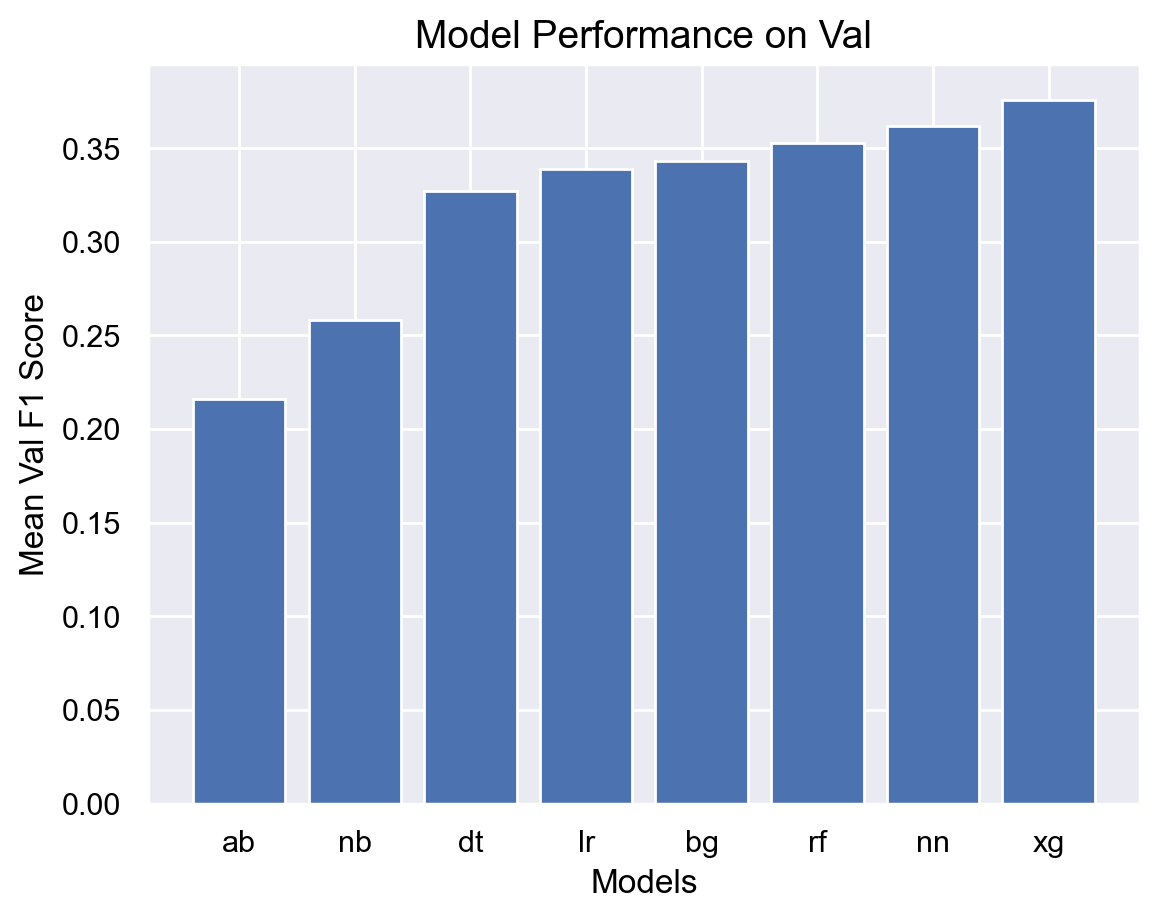

In [3]:
results_plot(results_df)

In [ ]:
# Save the returned dictionary in the 'results' folder
joblib.dump(results, '../results/cv_dict_default_models.pkl')

# Save the returned DataFrame in the 'results' folder
joblib.dump(results_df, '../results/cv_df_default_models.pkl')

['../results/cv_df_default_models.pkl']

**Best Default Models:** XGBoost, NeuralNetworks, RandomForest, Bagging
- the overfitting will probably decrease with hyperparameter tuning (so, we are ignoring it for now)
- some of the others will be tried as simple models for stacking